In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titan_df = pd.read_csv("train.csv")

In [3]:
titan_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
 titan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Some questions worth to investigate
#1. Passengers on Titanic
#2. Relationship with passenger's deck and class
#3. Original place of these passengers
#4. What might be benefitical factors in surviving

In [6]:
#First investigate some relatiomship between Sex and other columns

<AxesSubplot:xlabel='Sex', ylabel='count'>

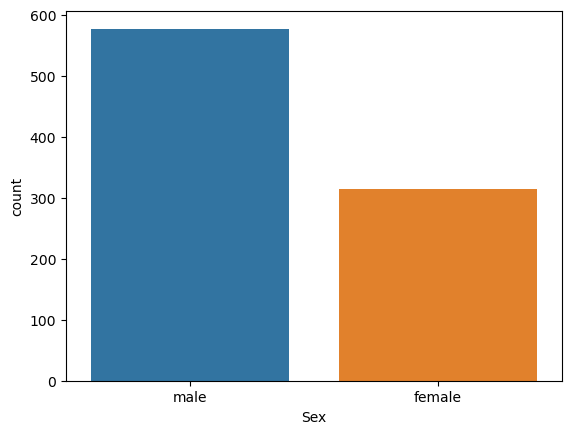

In [7]:
sns.countplot(data = titan_df, x = 'Sex')
#There are more male than female passengers

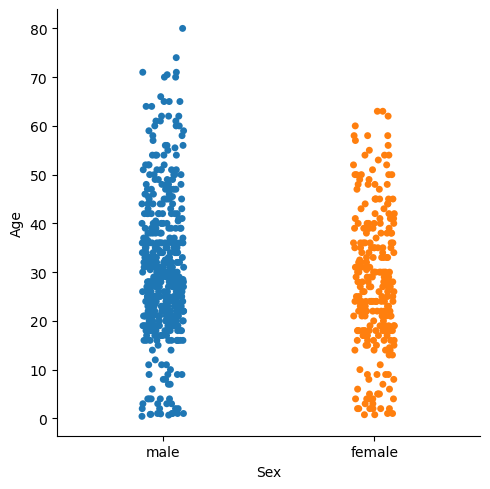

In [8]:
sns.catplot(x = 'Sex', y = 'Age', data = titan_df)
#Here's a brief look between sex and age. 

<AxesSubplot:xlabel='Sex', ylabel='count'>

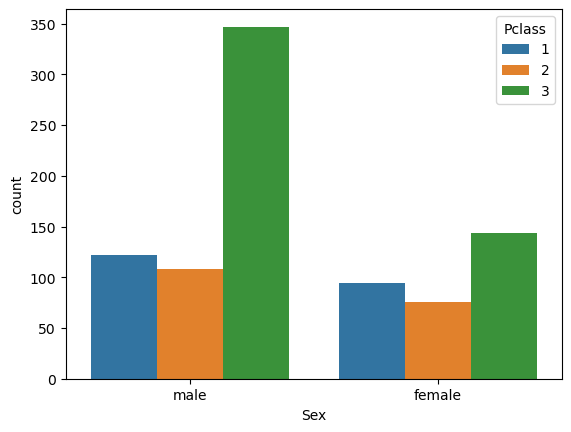

In [9]:
sns.countplot(data = titan_df, x = 'Sex', hue = "Pclass")
#Majority males are in 3rd class.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

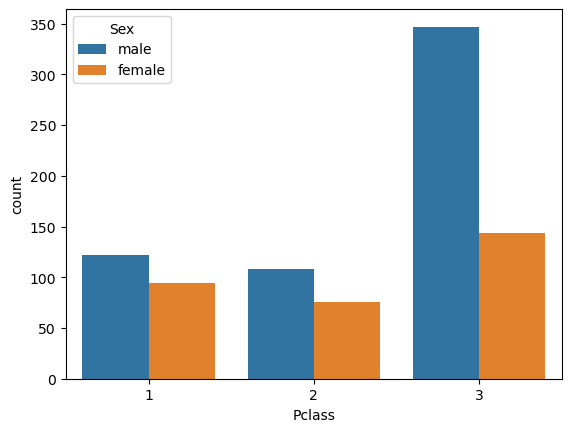

In [10]:
sns.countplot(data = titan_df, hue = 'Sex', x = "Pclass")
#Same as last graph

In [11]:
def child_gender_distinguish(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'Child'
    else:
        return sex

In [12]:
titan_df['Person'] = titan_df[['Age', 'Sex',]].apply(child_gender_distinguish, axis = 1)

In [13]:
titan_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male


<AxesSubplot:xlabel='Pclass', ylabel='count'>

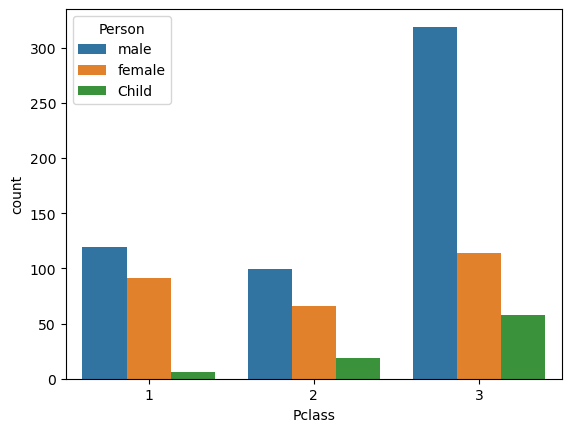

In [14]:
sns.countplot(data = titan_df, x = 'Pclass', hue = "Person")
#One finding here is that there are more child in thrid class than first class

<AxesSubplot:>

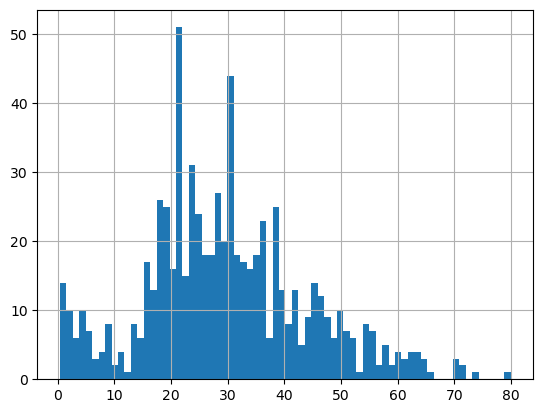

In [15]:
titan_df['Age'].hist(bins = 70)

In [16]:
titan_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
titan_df['Person'].value_counts()

male      537
female    271
Child      83
Name: Person, dtype: int64

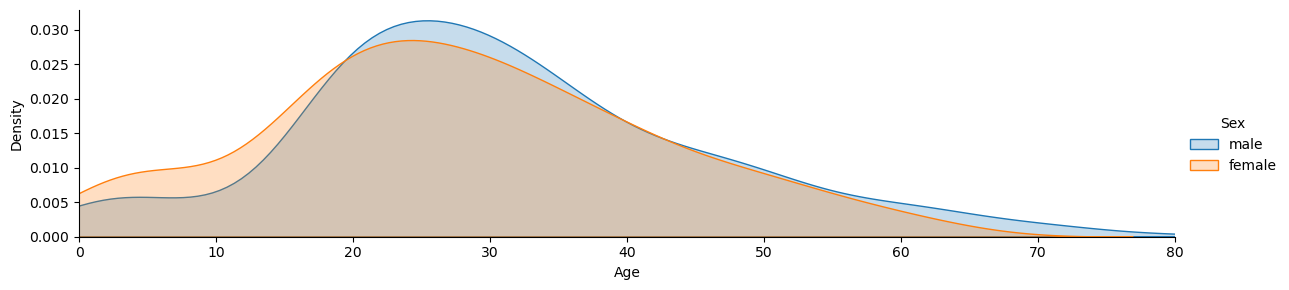

In [18]:
fig = sns.FacetGrid(titan_df, hue = 'Sex', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titan_df['Age'].max()
fig.set(xlim = (0, oldest))

fig.add_legend()

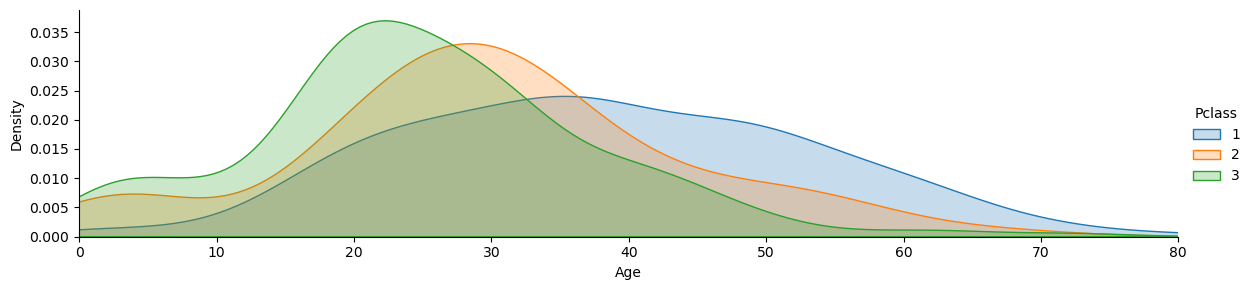

In [19]:
fig = sns.FacetGrid(titan_df, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titan_df['Age'].max()
fig.set(xlim = (0, oldest))

fig.add_legend()

In [20]:
#Other than gender and age, also want to take a look of the relationship between Cabin deck and passenger.
deck = titan_df['Cabin'].dropna()

In [21]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

<AxesSubplot:xlabel='Cabin', ylabel='count'>

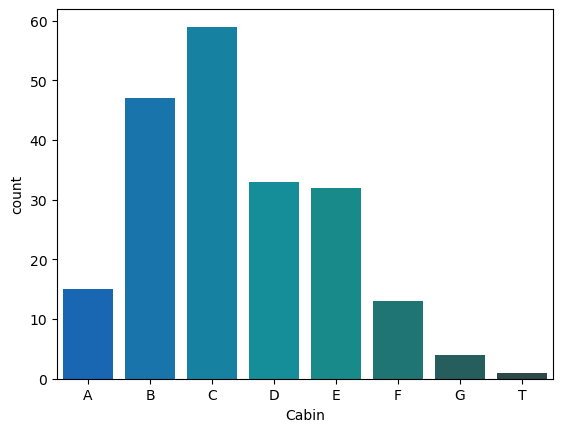

In [22]:
#Extract deck of each passenger
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot(x = cabin_df['Cabin'].sort_values(), data = cabin_df, palette = 'winter_d')

<AxesSubplot:xlabel='Cabin', ylabel='count'>

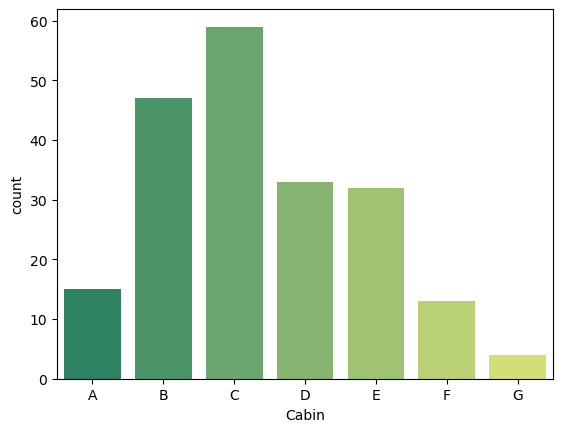

In [23]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.countplot(x = cabin_df['Cabin'].sort_values(), data = cabin_df, palette = 'summer')

In [24]:
titan_df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

<AxesSubplot:xlabel='Embarked', ylabel='count'>

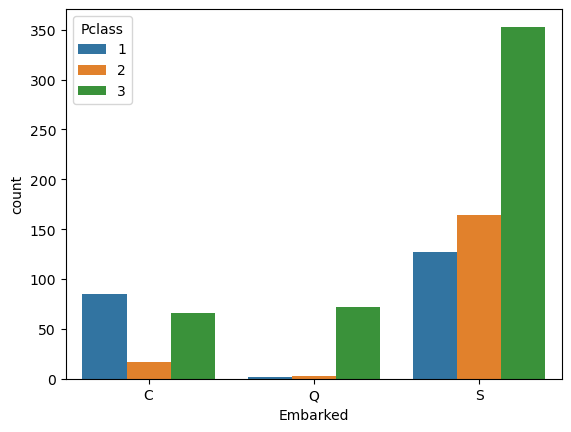

In [25]:
sns.countplot( x = titan_df['Embarked'], data = titan_df, hue = 'Pclass', order = ['C', 'Q', 'S'])
#Most passengers from Quuen's town are third class workers.

In [26]:
#Who board alone and who was with family
titan_df[['SibSp', 'Parch']]

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
886,0,0
887,0,0
888,1,2
889,0,0


In [27]:
titan_df['Alone'] = titan_df.SibSp + titan_df.Parch

In [28]:
titan_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [29]:
titan_df['Alone'].loc[titan_df['Alone'] > 0] = 'With Familiy'
titan_df['Alone'].loc[titan_df['Alone'] == 0] = 'Alone'

C:\Users\26288\AppData\Local\Temp\ipykernel_8092\3817383925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan_df['Alone'].loc[titan_df['Alone'] > 0] = 'With Familiy'


In [30]:
titan_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Familiy
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Familiy
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Familiy
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


<AxesSubplot:xlabel='Alone', ylabel='count'>

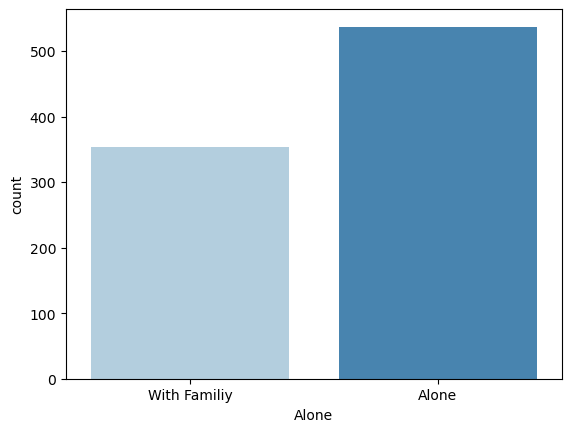

In [32]:
sns.countplot(x = titan_df['Alone'], data = titan_df, palette = 'Blues')

In [34]:
titan_df['Survivor'] = titan_df.Survived.map({0: 'No', 1: 'Yes'})

<AxesSubplot:xlabel='Survivor', ylabel='count'>

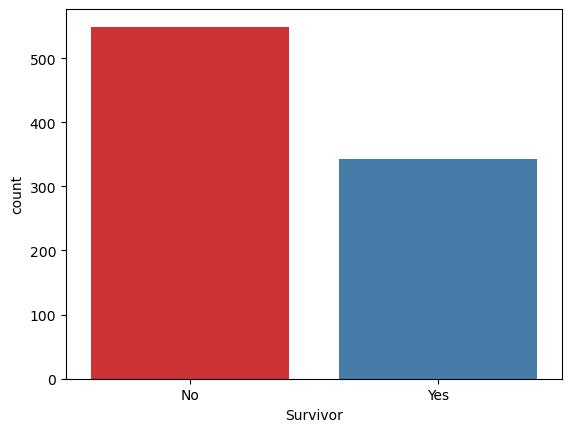

In [35]:
sns.countplot(x = titan_df['Survivor'], data = titan_df, palette = 'Set1')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

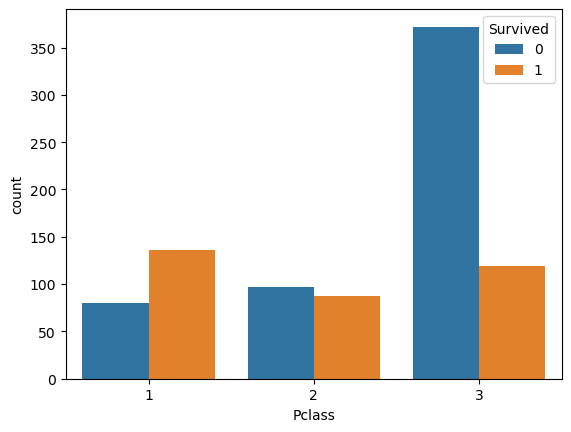

In [41]:
sns.countplot(x = titan_df['Pclass'], hue = titan_df['Survived'], data = titan_df)

C:\Users\26288\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


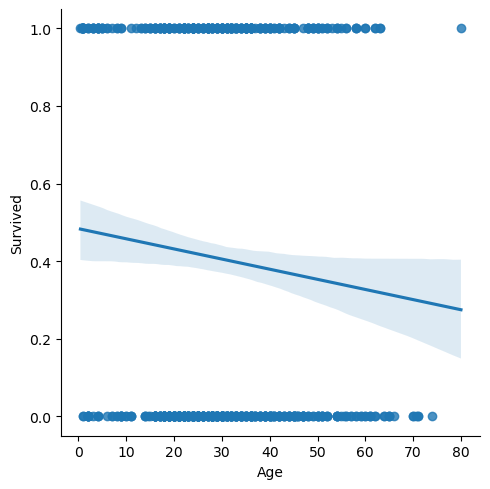

In [42]:
sns.lmplot('Age', 'Survived', data = titan_df)

C:\Users\26288\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


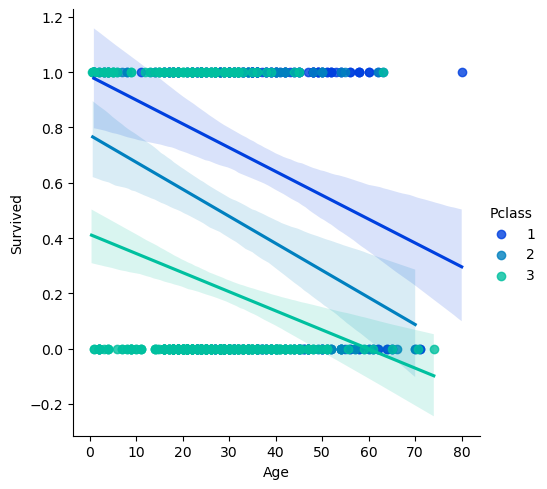

In [43]:
sns.lmplot('Age', 'Survived', hue = 'Pclass',  data = titan_df, palette = 'winter')

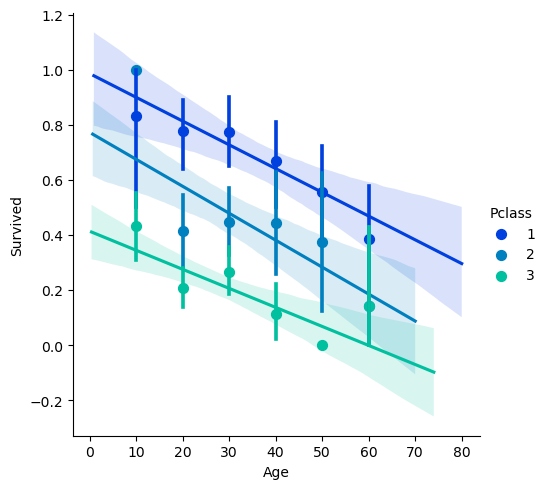

In [46]:
generations = [10,20,30,40,50,60]
sns.lmplot('Age', 'Survived', hue = 'Pclass',  data = titan_df, palette = 'winter', x_bins = generations)

C:\Users\26288\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


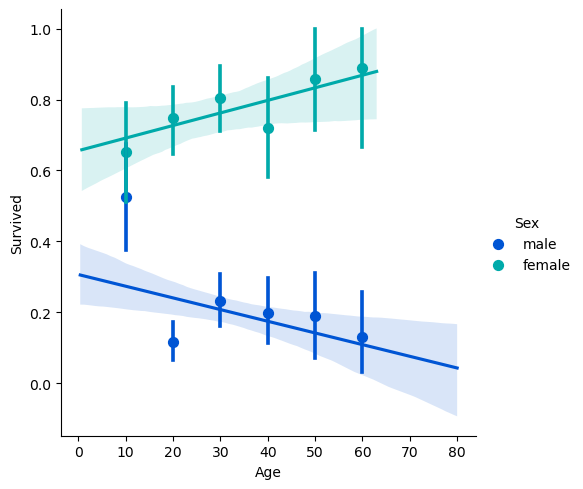

In [49]:
generations = [10,20,30,40,50,60]
sns.lmplot('Age', 'Survived', hue = 'Sex',  data = titan_df, palette = 'winter', x_bins = generations)
#old female has a higher survival rate than old male

In [61]:
#Maybe deck is related to survival rate?
def extract_Deck(Cabin):
    return Cabin[0] if pd.notna(Cabin) else np.nan

titan_df['Deck'] = titan_df['Cabin'].apply(extract_Deck)

<AxesSubplot:xlabel='Deck', ylabel='count'>

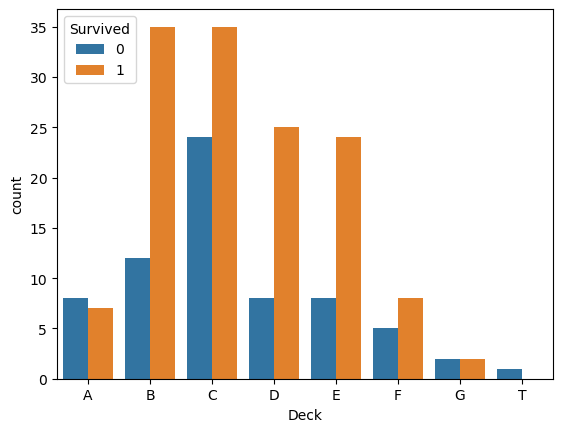

In [65]:
sns.countplot(x = titan_df['Deck'].sort_values(), hue = titan_df['Survived'], data = titan_df)
#We didn't specific trends between survival rate and deck.

In [51]:
#Having a family member will increase or decrease the survival rate? Or neither?

<AxesSubplot:xlabel='Alone', ylabel='count'>

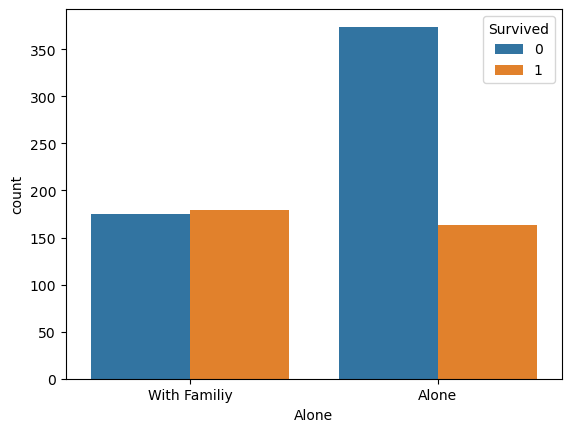

In [67]:
sns.countplot(x = titan_df['Alone'], hue = titan_df['Survived'], data = titan_df)
#This sows having a family member will increase the survival rate.